Ovaj skup sadrži podatke o korisnicima koji jesu ili nisu napravili kupovinu za prikazani oglas.
Podaci o korisnicima su spol, dob i procijenjena placa. Razmatra se binarni klasifikacijski
problem gdje su dob i procijenjena placa ulazne velicine, dok je kupovina (0 ili 1) izlazna velicina. Za vizualizaciju podatkovnih primjera i granice odluke u skripti je dostupna funkcija
plot_decision_region [1]. Podaci su podijeljeni na skup za ucenje i skup za testiranje modela
u omjeru 80%-20% te su standardizirani. Izgraden je model logisticke regresije te je izracunata
njegova tocnost na skupu podataka za ucenje i skupu podataka za testiranje. Potrebno je:

1. Izradite algoritam KNN na skupu podataka za ucenje (uz K=5). Izracunajte tocnost
klasifikacije na skupu podataka za ucenje i skupu podataka za testiranje. Usporedite
dobivene rezultate s rezultatima logisticke regresije. Što primjecujete vezano uz dobivenu
granicu odluke KNN modela?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    plt.figure()
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB
None


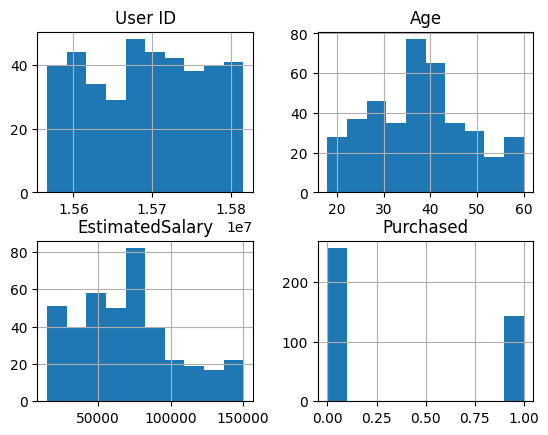

Logisticka regresija: 
Tocnost train: 0.825
Tocnost test: 0.900


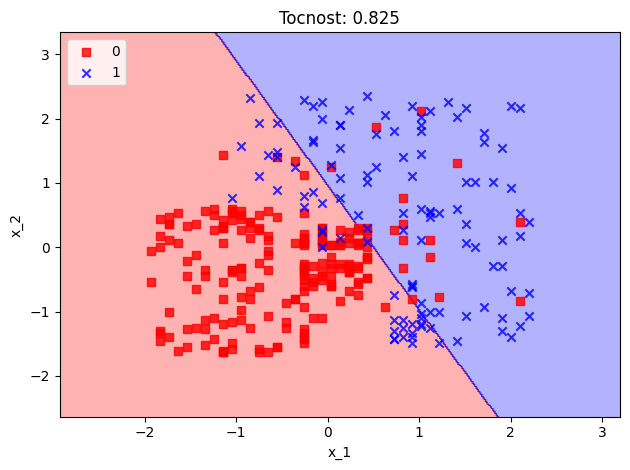

In [3]:
data = pd.read_csv("Data/Social_Network_Ads.csv")
print(data.info())

data.hist()
plt.show()

# dataframe u numpy
X = data[["Age","EstimatedSalary"]].to_numpy()
y = data["Purchased"].to_numpy()

# podijeli podatke u omjeru 80-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 10)

# skaliraj ulazne velicine
sc = StandardScaler()
X_train_n = sc.fit_transform(X_train)
X_test_n = sc.transform((X_test))

# Model logisticke regresije
LogReg_model = LogisticRegression(penalty=None)
LogReg_model.fit(X_train_n, y_train)

# Evaluacija modela logisticke regresije
y_train_p = LogReg_model.predict(X_train_n)
y_test_p = LogReg_model.predict(X_test_n)

print("Logisticka regresija: ")
print("Tocnost train: " + "{:0.3f}".format((accuracy_score(y_train, y_train_p))))
print("Tocnost test: " + "{:0.3f}".format((accuracy_score(y_test, y_test_p))))

# granica odluke pomocu logisticke regresije
plot_decision_regions(X_train_n, y_train, classifier=LogReg_model)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(loc='upper left')
plt.title("Tocnost: " + "{:0.3f}".format((accuracy_score(y_train, y_train_p))))
plt.tight_layout()
plt.show()

In [4]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_n, y_train)

KNeighborsClassifier()

In [5]:
y_train_knn = knn.predict(X_train_n)
y_test_knn = knn.predict(X_test_n)

print("KNN: ")
print("Tocnost train: " + "{:0.3f}".format((accuracy_score(y_train, y_train_knn))))
print("Tocnost test: " + "{:0.3f}".format((accuracy_score(y_test, y_test_knn))))

KNN: 
Tocnost train: 0.922
Tocnost test: 0.912


2. Kako izgleda granica odluke kada je K =1 i kada je K = 100?

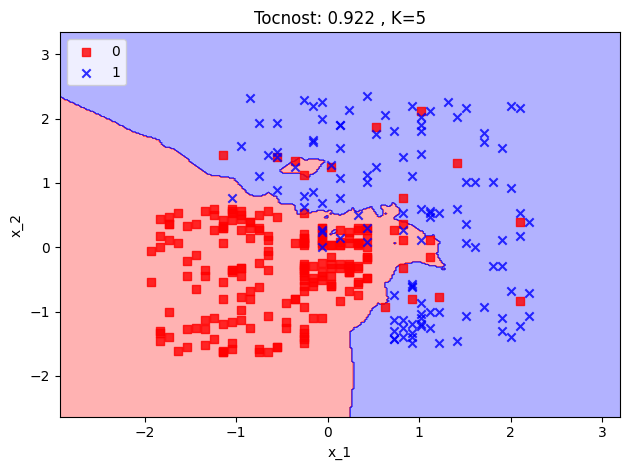

In [6]:
plot_decision_regions(X_train_n, y_train, classifier=knn)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(loc='upper left')
plt.title("Tocnost: " + "{:0.3f}".format((accuracy_score(y_train, y_train_knn))) + " , K=5")
plt.tight_layout()
plt.show()

#Kada je K=1 dogadja se overfitting, a kada je K=100 underfitting
#Za K=1 tocnost je 0.944 za train, a 0.850 za test
#Za K=100 tocnost je 0.797 za train, a 0.825 za test

Pomocu unakrsne validacije odredite optimalnu vrijednost hiperparametra K algoritma KNN za podatke iz Zadatka 1.

In [7]:
knn_2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 100) }
knn2_gscv = GridSearchCV(knn_2, param_grid, cv=5)
knn2_gscv.fit(X_train_n, y_train)
print (knn2_gscv.best_params_)
print (knn2_gscv.best_score_)
#Najbolja tocnost je za K=7



{'n_neighbors': 7}
0.90625


Text(0, 0.5, 'Accuracy Score')

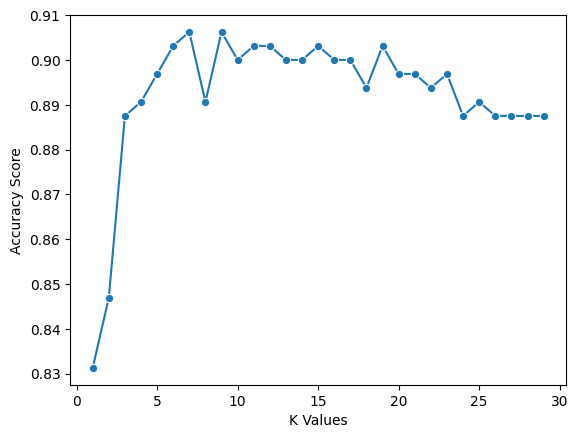

In [8]:
from sklearn . model_selection import cross_val_score
import seaborn as sns

k_values = [i for i in range (1,30)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_n, y_train, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

Na podatke iz Zadatka 1 primijenite SVM model koji koristi RBF kernel funkciju
te prikažite dobivenu granicu odluke. Mijenjajte vrijednost hiperparametra C i γ. Kako promjena
ovih hiperparametara utjece na granicu odluke te pogrešku na skupu podataka za testiranje?
Mijenjajte tip kernela koji se koristi. Što primjecujete?

In [9]:
svm_model= svm.SVC(C=10, gamma=1, kernel='rbf')
svm_model.fit(X_train_n, y_train)

SVC(C=10, gamma=1)

In [10]:
y_train_svm = svm_model.predict(X_train_n)
y_test_svm = svm_model.predict(X_test_n)

print("SVM: ")
print("Tocnost train: " + "{:0.3f}".format((accuracy_score(y_train, y_train_svm))))
print("Tocnost test: " + "{:0.3f}".format((accuracy_score(y_test, y_test_svm))))

SVM: 
Tocnost train: 0.922
Tocnost test: 0.925


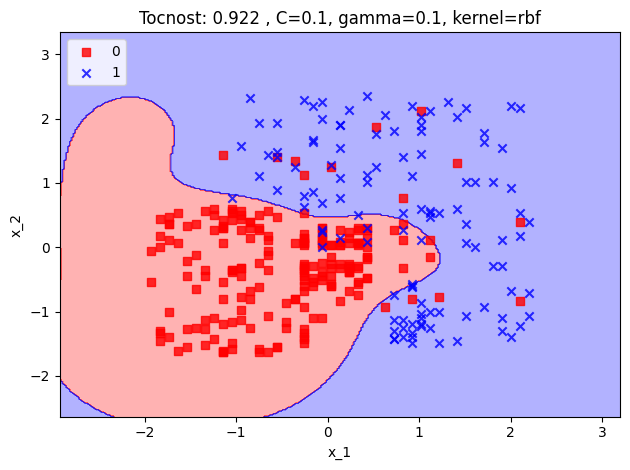

In [11]:
plot_decision_regions(X_train_n, y_train, classifier=svm_model)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(loc='upper left')
plt.title("Tocnost: " + "{:0.3f}".format((accuracy_score(y_train, y_train_svm))) + " , C=0.1, gamma=0.1, kernel=rbf")
plt.tight_layout()
plt.show()

#Kada se kernel stavi na 'linear' tocnost se znacajno smanji

Pomocu unakrsne validacije odredite optimalnu vrijednost hiperparametra C i γ algoritma SVM za problem iz Zadatka 1.

In [12]:
SVM_model2 = svm.SVC()

param_grid = {"C" : [10, 100, 100],
              "gamma" : [10, 1, 0.1, 0.01]}

svm_gscv = GridSearchCV(SVM_model2, param_grid, cv=5,
                        scoring='accuracy', n_jobs=-1)
svm_gscv.fit(X_train_n, y_train)

print(svm_gscv.best_params_)
print(svm_gscv.best_score_)
print(svm_gscv.cv_results_)

#Najbolja tocnost je za C=10, gamma=1

{'C': 10, 'gamma': 1}
0.9125
{'mean_fit_time': array([0.00569897, 0.0036458 , 0.00352407, 0.00331683, 0.00649128,
       0.00565987, 0.00441904, 0.00323906, 0.00548983, 0.00554447,
       0.00394754, 0.00318718]), 'std_fit_time': array([0.00046418, 0.00047481, 0.00046205, 0.00022842, 0.00284574,
       0.00045323, 0.00070354, 0.00033902, 0.00100592, 0.00043618,
       0.00022881, 0.00030012]), 'mean_score_time': array([0.00170469, 0.00122848, 0.00149493, 0.00175176, 0.00300541,
       0.00125179, 0.00124116, 0.00138793, 0.00158253, 0.00122552,
       0.00124002, 0.00127959]), 'std_score_time': array([1.13004270e-04, 8.02442844e-05, 2.51539913e-04, 3.72493627e-04,
       2.31526874e-03, 4.15175955e-05, 5.28765755e-05, 2.22849834e-05,
       5.21335030e-05, 1.53830062e-05, 3.07968150e-05, 2.45187886e-04]), 'param_C': masked_array(data=[10, 10, 10, 10, 100, 100, 100, 100, 100, 100, 100, 100],
             mask=[False, False, False, False, False, False, False, False,
                   Fal